In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("income_evaluation.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [7]:
df.columns=df.columns.str.strip()

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
df.rename(columns={"fnlwgt": "final-weight"}, inplace=True)

In [10]:
df.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
df.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [13]:
df["income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [14]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [15]:
categorical_columns=[col for col in df.columns if df[col].dtype=="O"]
numerical_columns=[col for col in df.columns if df[col].dtype!="O"]

In [16]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [17]:
numerical_columns

['age',
 'final-weight',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [18]:
df[categorical_columns].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [19]:
for col in categorical_columns:
    print(df[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

<Axes: xlabel='income', ylabel='count'>

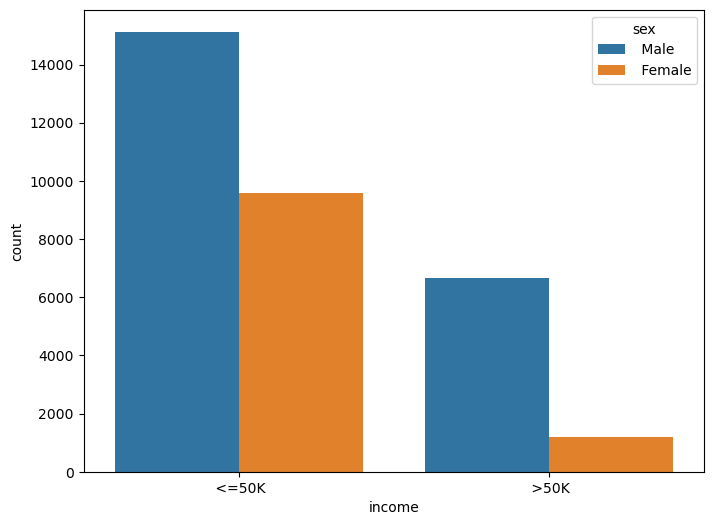

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x="income", hue="sex", data=df)

<Axes: xlabel='income', ylabel='count'>

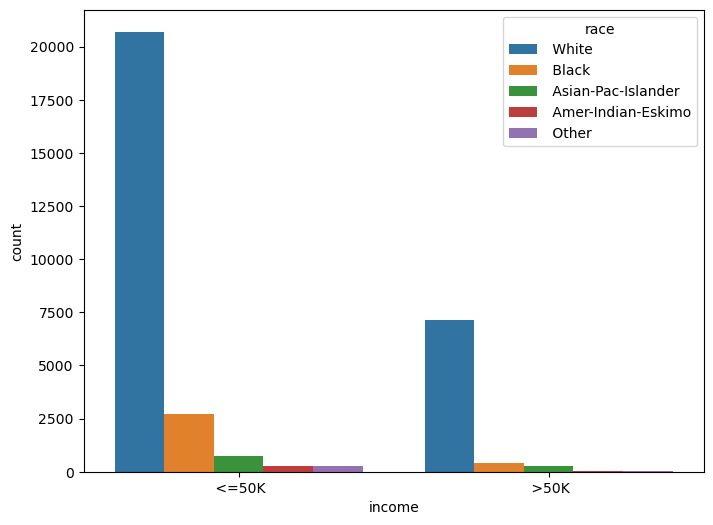

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x="income", hue="race", data=df)

([<matplotlib.patches.Wedge at 0x27655036660>,
 [Text(-0.9867233098695612, 0.48618629120950957, ' White'),
  Text(0.8989501036003791, -0.6339469309310267, ' Black'),
  Text(1.0752451177935916, -0.23205158189731356, ' Asian-Pac-Islander'),
  Text(1.0962767485997393, -0.09042837209407129, ' Amer-Indian-Eskimo'),
  Text(1.0996239998520445, -0.02875863260641422, ' Other')],
 [Text(-0.5382127144743061, 0.26519252247791425, '85.4%'),
  Text(0.49033642014566126, -0.34578923505328724, '9.6%'),
  Text(0.5864973369783226, -0.12657359012580738, '3.2%'),
  Text(0.5979691355998578, -0.04932456659676615, '1.0%'),
  Text(0.599794909010206, -0.015686526876225935, '0.8%')])

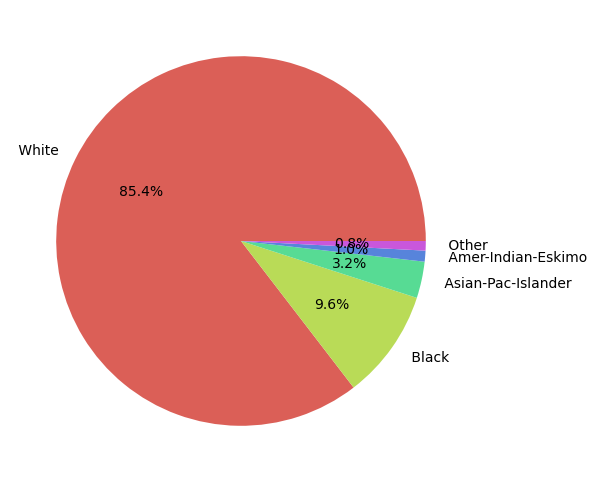

In [22]:
colors = sns.color_palette("hls", 5)
plt.figure(figsize=(8,6))
plt.pie(x=df["race"].value_counts(),labels=df["race"].value_counts().index, autopct='%1.1f%%',colors=colors )

([<matplotlib.patches.Wedge at 0x276558cbb10>,
 [Text(-0.5575806930085762, 0.948210826126804, ' Male'),
  Text(0.5575805498327184, -0.9482109103191355, ' Female')],
 [Text(-0.3041349234592233, 0.5172059051600748, '66.9%'),
  Text(0.30413484536330093, -0.5172059510831648, '33.1%')])

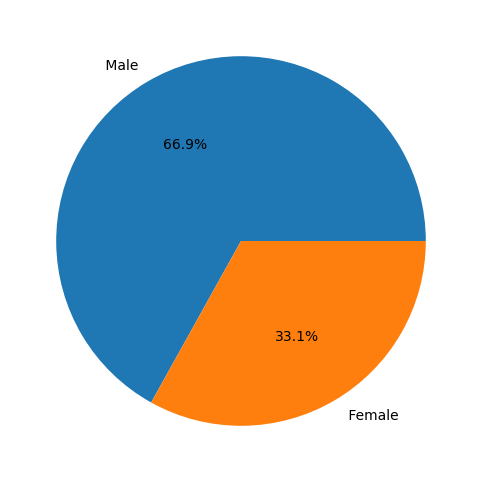

In [23]:
plt.figure(figsize=(8,6))
plt.pie(x=df["sex"].value_counts(),labels=df["sex"].value_counts().index, autopct='%1.1f%%' )

([<matplotlib.patches.Wedge at 0x27655907750>,
 [Text(-0.7999478707000827, 0.7550386772625651, ' <=50K'),
  Text(0.7999479367076598, -0.7550386073288955, ' >50K')],
 [Text(-0.436335202200045, 0.41183927850685365, '75.9%'),
  Text(0.436335238204178, -0.41183924036121566, '24.1%')])

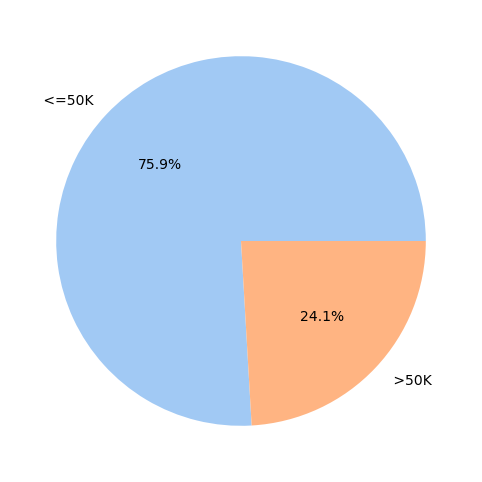

In [24]:
colors = sns.color_palette("pastel", 2)
plt.figure(figsize=(8,6))
plt.pie(x=df["income"].value_counts(),labels=df["income"].value_counts().index, autopct='%1.1f%%',colors=colors )

<Axes: ylabel='age'>

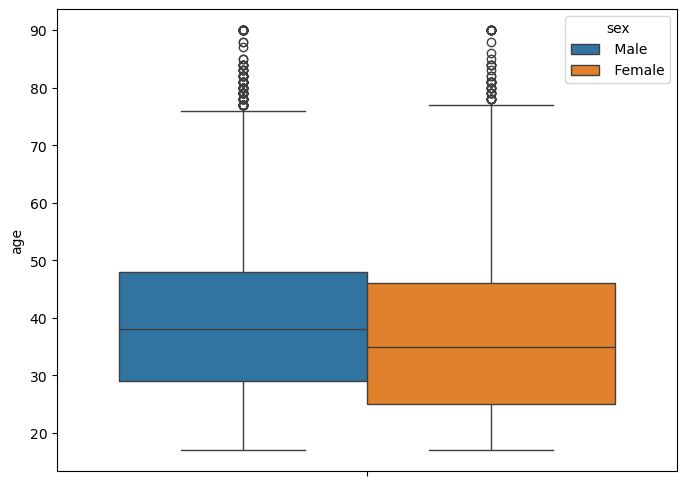

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(y="age", data=df, hue="sex")

<Axes: >

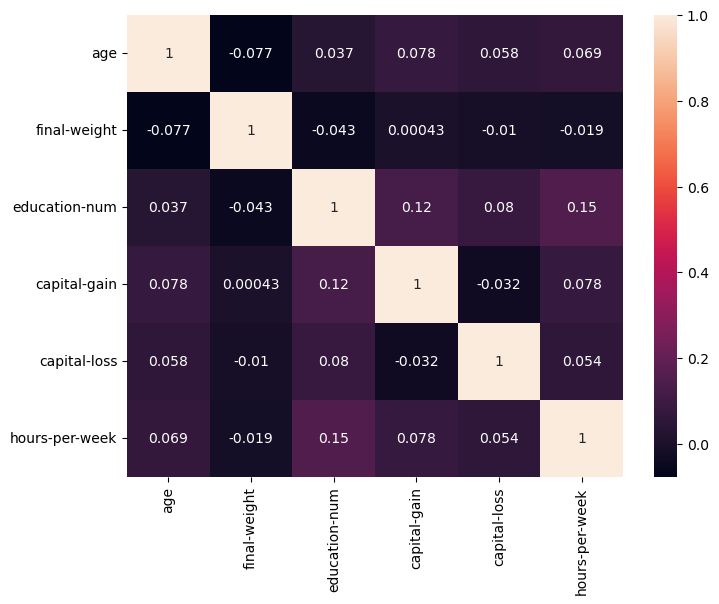

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df[numerical_columns].corr(),annot=True)

In [27]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [28]:
df["workclass"]=df["workclass"].replace(" ?",np.nan)

In [29]:
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [30]:
df["occupation"]=df["occupation"].replace(" ?",np.nan)

In [31]:
df["native-country"].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [32]:
df["native-country"]=df["native-country"].replace(" ?",np.nan)

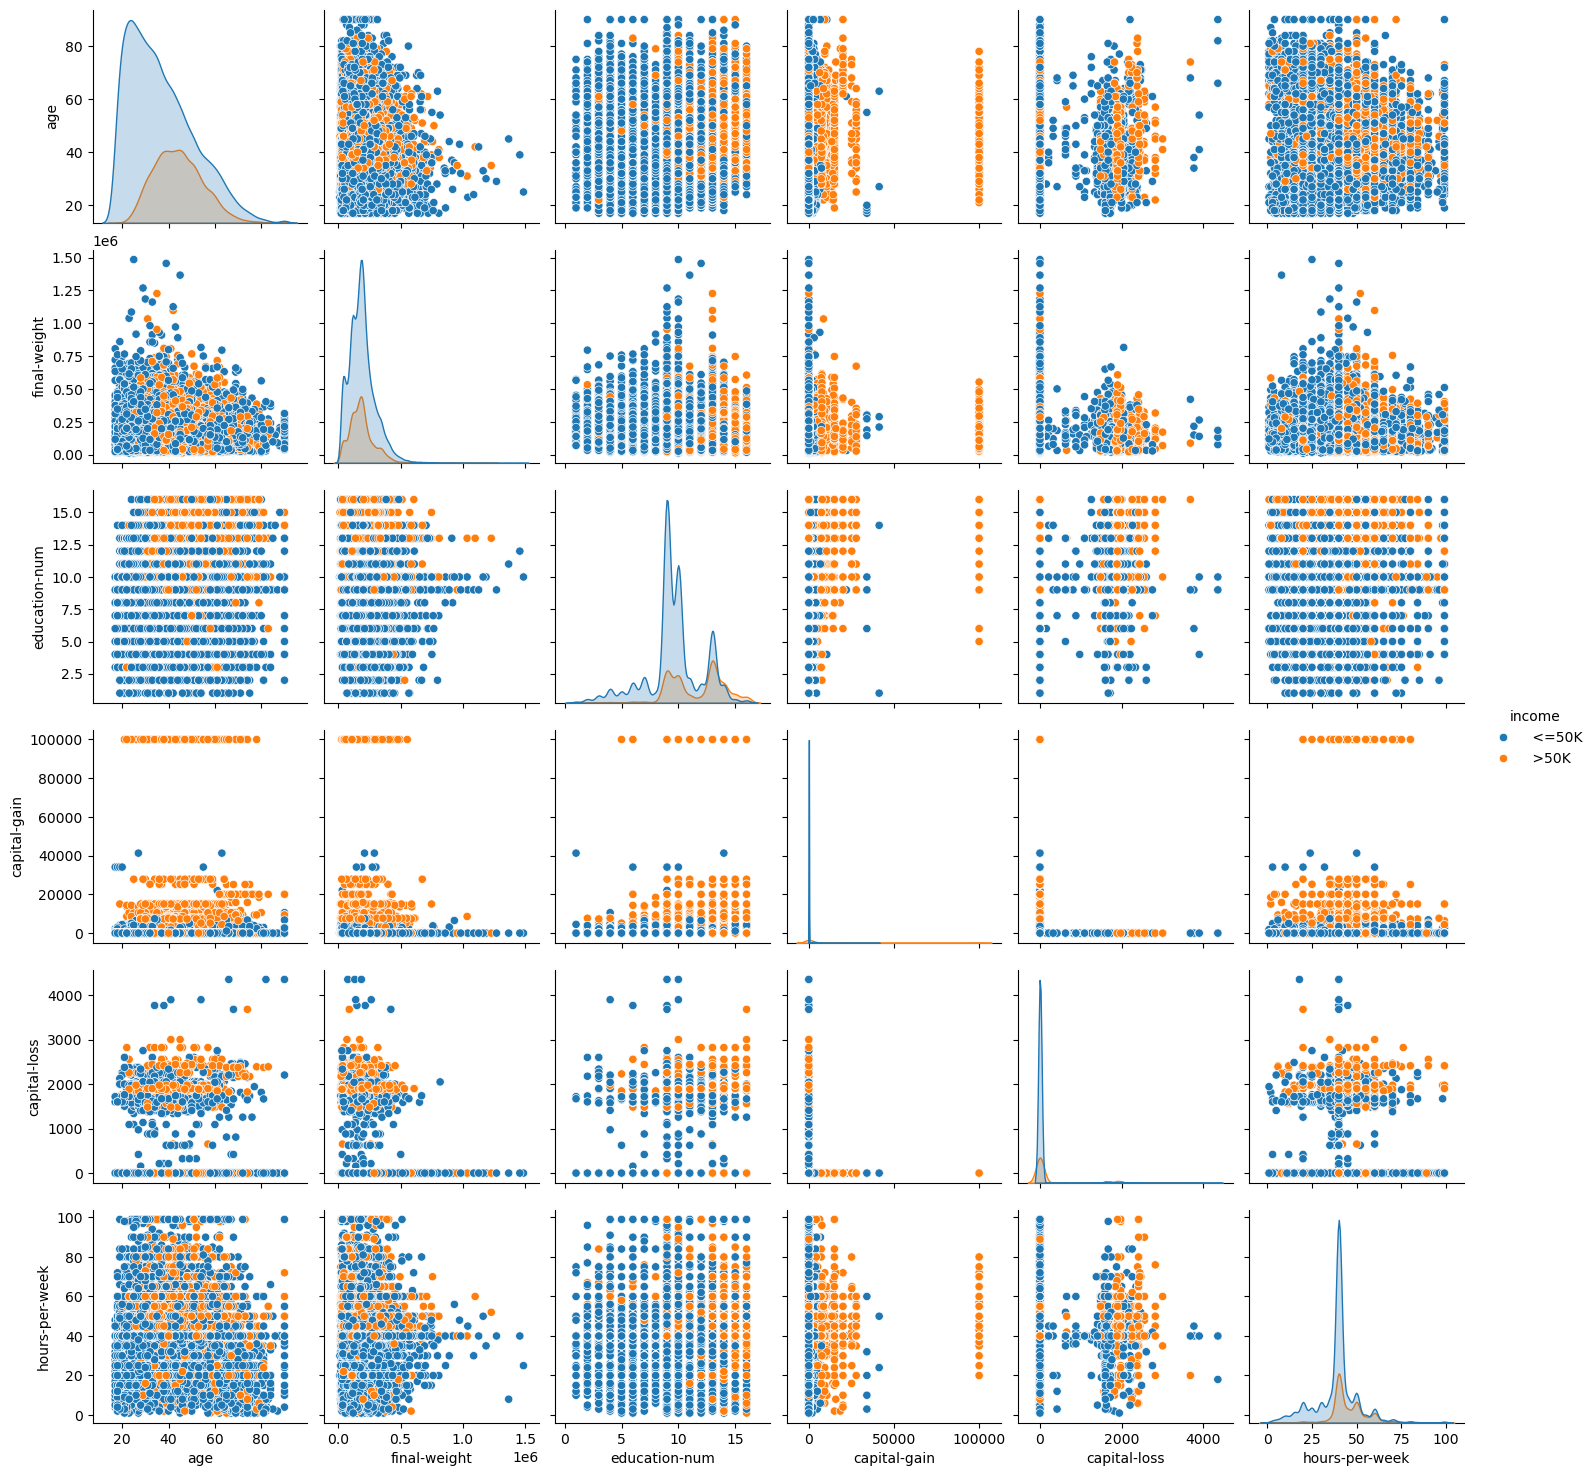

In [33]:
sns.pairplot(df,hue="income")
plt.show()

In [34]:
X=df.drop("income",axis=1)
y=df["income"]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=8)

In [36]:
categorical_columns=[col for col in X_train.columns if X_train[col].dtype=="O"]

In [37]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [38]:
X_train[categorical_columns].isnull().sum()

workclass         1291
education            0
marital-status       0
occupation        1296
relationship         0
race                 0
sex                  0
native-country     420
dtype: int64

In [39]:
for i in [X_train, X_test]:
    i['workclass'] = i['workclass'].fillna(X_train['workclass'].mode()[0])
    i['occupation'] = i['occupation'].fillna(X_train['occupation'].mode()[0])
    i['native-country'] = i['native-country'].fillna(X_train['native-country'].mode()[0])

In [40]:
X_train[categorical_columns].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [41]:
X_train.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [42]:
X_test.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [43]:
#Since there are too many values in the "native country" column, we will perform mean encoding based on the "income" column.
y_train_binary = y_train.apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [44]:
target_means = y_train_binary.groupby(X_train['native-country']).mean()

In [45]:
target_means

native-country
Cambodia                      0.437500
Canada                        0.337209
China                         0.218182
Columbia                      0.047619
Cuba                          0.301587
Dominican-Republic            0.021277
Ecuador                       0.176471
El-Salvador                   0.112676
England                       0.362069
France                        0.555556
Germany                       0.320388
Greece                        0.291667
Guatemala                     0.022222
Haiti                         0.071429
Holand-Netherlands            0.000000
Honduras                      0.000000
Hong                          0.357143
Hungary                       0.142857
India                         0.373333
Iran                          0.464286
Ireland                       0.150000
Italy                         0.357143
Jamaica                       0.095238
Japan                         0.400000
Laos                          0.076923
Mexico    

In [46]:
X_train['native-country-encoded'] = X_train['native-country'].map(target_means)
X_train['native-country-encoded'] = X_train['native-country-encoded'].fillna(y_train_binary.mean())

X_test['native-country-encoded'] = X_test['native-country'].map(target_means)
X_test['native-country-encoded'] = X_test['native-country-encoded'].fillna(y_train_binary.mean())

In [47]:
X_train = X_train.drop("native-country", axis=1)
X_test = X_test.drop("native-country", axis=1)

In [48]:
one_hot_categories = ['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_categories)
    ],
    remainder='passthrough'  # leave the rest of the columns as it is
)
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [50]:
columns = encoder.get_feature_names_out()

In [51]:
X_train = pd.DataFrame(X_train_enc, columns=columns, index=X_train.index)
X_test = pd.DataFrame(X_test_enc, columns=columns, index=X_test.index)

In [52]:

X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__final-weight,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__native-country-encoded
23724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,31.0,264864.0,9.0,0.0,0.0,40.0,0.245458
10507,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,27.0,200733.0,9.0,0.0,0.0,55.0,0.245458
22072,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,36.0,166606.0,7.0,0.0,0.0,40.0,0.245458
26932,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,25.0,113035.0,10.0,0.0,0.0,40.0,0.245458
9941,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,37.0,301568.0,9.0,0.0,0.0,35.0,0.245458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,34.0,244147.0,13.0,0.0,0.0,40.0,0.245458
26985,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,38.0,103323.0,10.0,7688.0,0.0,40.0,0.245458
18417,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,24.0,117167.0,10.0,0.0,0.0,53.0,0.245458
25940,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,24.0,235071.0,7.0,0.0,0.0,50.0,0.245458


In [53]:
X_test

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__final-weight,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__native-country-encoded
21086,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,43.0,154076.0,10.0,0.0,0.0,40.0,0.245458
30753,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,58.0,236596.0,10.0,0.0,0.0,40.0,0.245458
25119,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,37.0,51264.0,11.0,0.0,0.0,40.0,0.245458
2407,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,42.0,250121.0,7.0,0.0,0.0,40.0,0.245458
27377,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,40.0,89413.0,9.0,0.0,1672.0,40.0,0.245458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14925,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,31.0,113543.0,10.0,0.0,0.0,40.0,0.245458
13421,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,50.0,108926.0,10.0,0.0,0.0,40.0,0.245458
17426,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,38.0,243484.0,13.0,0.0,0.0,28.0,0.245458
6688,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,21.0,166704.0,10.0,0.0,0.0,14.0,0.245458


In [54]:
from sklearn.ensemble import RandomForestClassifier


In [55]:
rfc = RandomForestClassifier(n_estimators=10, random_state=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=15)

In [56]:
y_pred = rfc.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [58]:
print(f'Model accuracy score with 10 decision-trees : {accuracy_score(y_test, y_pred)}')

Model accuracy score with 10 decision-trees : 0.8505476507319071


In [59]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(f'Model accuracy score with default decision-trees : {accuracy_score(y_test, y_pred)}')

Model accuracy score with default decision-trees : 0.8578155389497389


In [60]:
rfc.feature_importances_

array([4.79642704e-03, 6.10042458e-03, 2.70365381e-06, 1.13812469e-02,
       6.34514777e-03, 8.33157170e-03, 4.61451184e-03, 5.07162371e-05,
       1.34362092e-03, 2.19870750e-03, 7.73004748e-04, 2.26968714e-04,
       6.20776209e-04, 1.84402357e-03, 1.14398778e-03, 2.26937160e-03,
       2.96477965e-03, 1.04899173e-02, 3.06232941e-03, 7.82118044e-03,
       7.55869424e-03, 4.51253471e-05, 4.32408837e-03, 5.24683150e-03,
       6.23461003e-03, 3.13789482e-04, 6.25658041e-02, 1.01127255e-03,
       2.61425604e-02, 1.36284182e-03, 1.40481898e-03, 5.91174797e-03,
       1.42911496e-05, 7.84594998e-03, 1.80950143e-02, 3.99108917e-03,
       3.08527045e-03, 4.29257219e-03, 7.44015524e-03, 8.12512110e-05,
       1.08157477e-02, 3.12686592e-03, 7.93814541e-03, 5.04670146e-03,
       5.11177319e-03, 3.75033706e-02, 1.12045704e-02, 1.61117751e-03,
       9.88218441e-03, 4.25379009e-03, 1.05053763e-02, 1.35371919e-03,
       3.57517483e-03, 5.02512173e-03, 9.74639543e-04, 6.96470709e-03,
      

In [61]:

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [62]:
feature_scores.tail(10)

cat__race_ Other                          0.000975
cat__education_ 12th                      0.000773
cat__education_ 5th-6th                   0.000621
cat__marital-status_ Married-AF-spouse    0.000314
cat__education_ 1st-4th                   0.000227
cat__occupation_ Priv-house-serv          0.000081
cat__workclass_ Without-pay               0.000051
cat__education_ Preschool                 0.000045
cat__occupation_ Armed-Forces             0.000014
cat__workclass_ Never-worked              0.000003
dtype: float64

In [63]:
X_train = X_train.drop(["cat__workclass_ Never-worked", "cat__occupation_ Armed-Forces","cat__education_ Preschool",
                       "cat__workclass_ Without-pay", "cat__occupation_ Priv-house-serv", "cat__marital-status_ Married-AF-spouse",
                        "cat__education_ 1st-4th", "cat__education_ 5th-6th", "cat__race_ Other", "cat__education_ 12th"
                       ], axis=1)


In [64]:
X_test = X_test.drop(["cat__workclass_ Never-worked", "cat__occupation_ Armed-Forces","cat__education_ Preschool",
                       "cat__workclass_ Without-pay", "cat__occupation_ Priv-house-serv", "cat__marital-status_ Married-AF-spouse",
                        "cat__education_ 1st-4th", "cat__education_ 5th-6th", "cat__race_ Other", "cat__education_ 12th"
                       ], axis=1)

In [65]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(f'Model accuracy score with default decision-trees : {accuracy_score(y_test, y_pred)}')

Model accuracy score with default decision-trees : 0.8581226328180981


0.8581226328180981
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7422
        >50K       0.75      0.62      0.68      2347

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



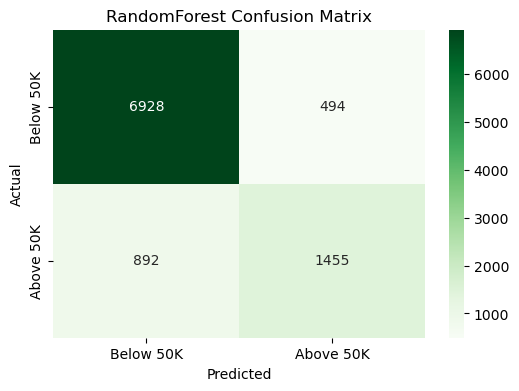

In [66]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
           xticklabels=["Below 50K","Above 50K"],
           yticklabels=["Below 50K","Above 50K",])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForest Confusion Matrix')
plt.show()

In [67]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_params,n_iter=10,cv=3,verbose=2,n_jobs=-1)
rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [5, 7, 'auto', 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=2)

In [70]:
rscv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 20,
 'max_features': 8,
 'max_depth': 15}

In [71]:
y_pred = rscv.predict(X_test)
print(f'Model accuracy score with default decision-trees : {accuracy_score(y_test, y_pred)}')

Model accuracy score with default decision-trees : 0.8634455932029891


0.8634455932029891
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7422
        >50K       0.80      0.57      0.67      2347

    accuracy                           0.86      9769
   macro avg       0.84      0.76      0.79      9769
weighted avg       0.86      0.86      0.86      9769



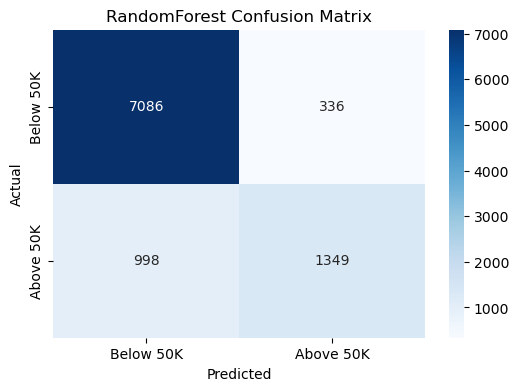

In [72]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
           xticklabels=["Below 50K","Above 50K"],
           yticklabels=["Below 50K","Above 50K",])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForest Confusion Matrix')
plt.show()